In [152]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from scipy.stats import randint

one_hot_df = pd.read_csv('Data/allData/oneHotDfAllCols.csv')

In [67]:
# https://www.mdpi.com/2078-2489/14/3/161
# based on the above paper, we will compare the results of the following models:
# 1. Random Forest
# 2. Decision Tree
# 3. Logistic Regression
# 4. Gradient Boosting
# 5. Deep Learning/MLP

model_metrics = {'randomForest': 0, 'decisionTree': 0, 'logisticRegression': 0, 'gradientBoosting': 0, 'mlp': 0}

In [153]:
one_hot_df.drop(columns=['Unnamed: 0', 'STATE', 'RACE', 'OFFDETAIL', 'ADMTYPE', 'OFFGENERAL', 'ADMITYR', 'RELYR', 'RELTYPE', 'AGERLSE', 'TIMESRVD'], inplace=True)

# "independent" variables
feature_cols = list(one_hot_df.columns.values)
feature_cols.remove('SENTLGTH')

# get a random sample of 100000 rows
one_hot_df = one_hot_df.sample(n=100000, random_state=1)

X = one_hot_df[feature_cols] # Features
y = one_hot_df['SENTLGTH'] # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
rf = RandomForestRegressor()
history = rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

mae = str(np.mean(abs(rf_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['randomForest'] = mae

Mean Absolute Error: 0.8950070013798909


In [70]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

mae = str(np.mean(abs(dt_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['decisionTree'] = mae

Mean Absolute Error: 0.9900490871432016


In [71]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

lr_y_pred = logreg.predict(X_test)

mae = str(np.mean(abs(lr_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['logisticRegression'] = mae

Mean Absolute Error: 1.0123666666666666


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
# Gradient Boosting Model
from sklearn.ensemble import HistGradientBoostingRegressor
gb = HistGradientBoostingRegressor()
gb.fit(X_train, y_train)

gb_y_pred = gb.predict(X_test)

mae = str(np.mean(abs(gb_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['gradientBoosting'] = mae

Mean Absolute Error: 0.8491548752526


In [73]:
# Deep Learning Model with MLPRegressor
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

mlp_y_pred = regr.predict(X_test)
print("R^2 Score: ", regr.score(X_test, y_test))

mae = str(np.mean(abs(mlp_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['mlp'] = mae

R^2 Score:  -0.01775172841157313
Mean Absolute Error: 1.108189833921509


In [75]:
# save metrics to csv

metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['mae'])
metrics_df.to_csv('Results/metrics.csv')


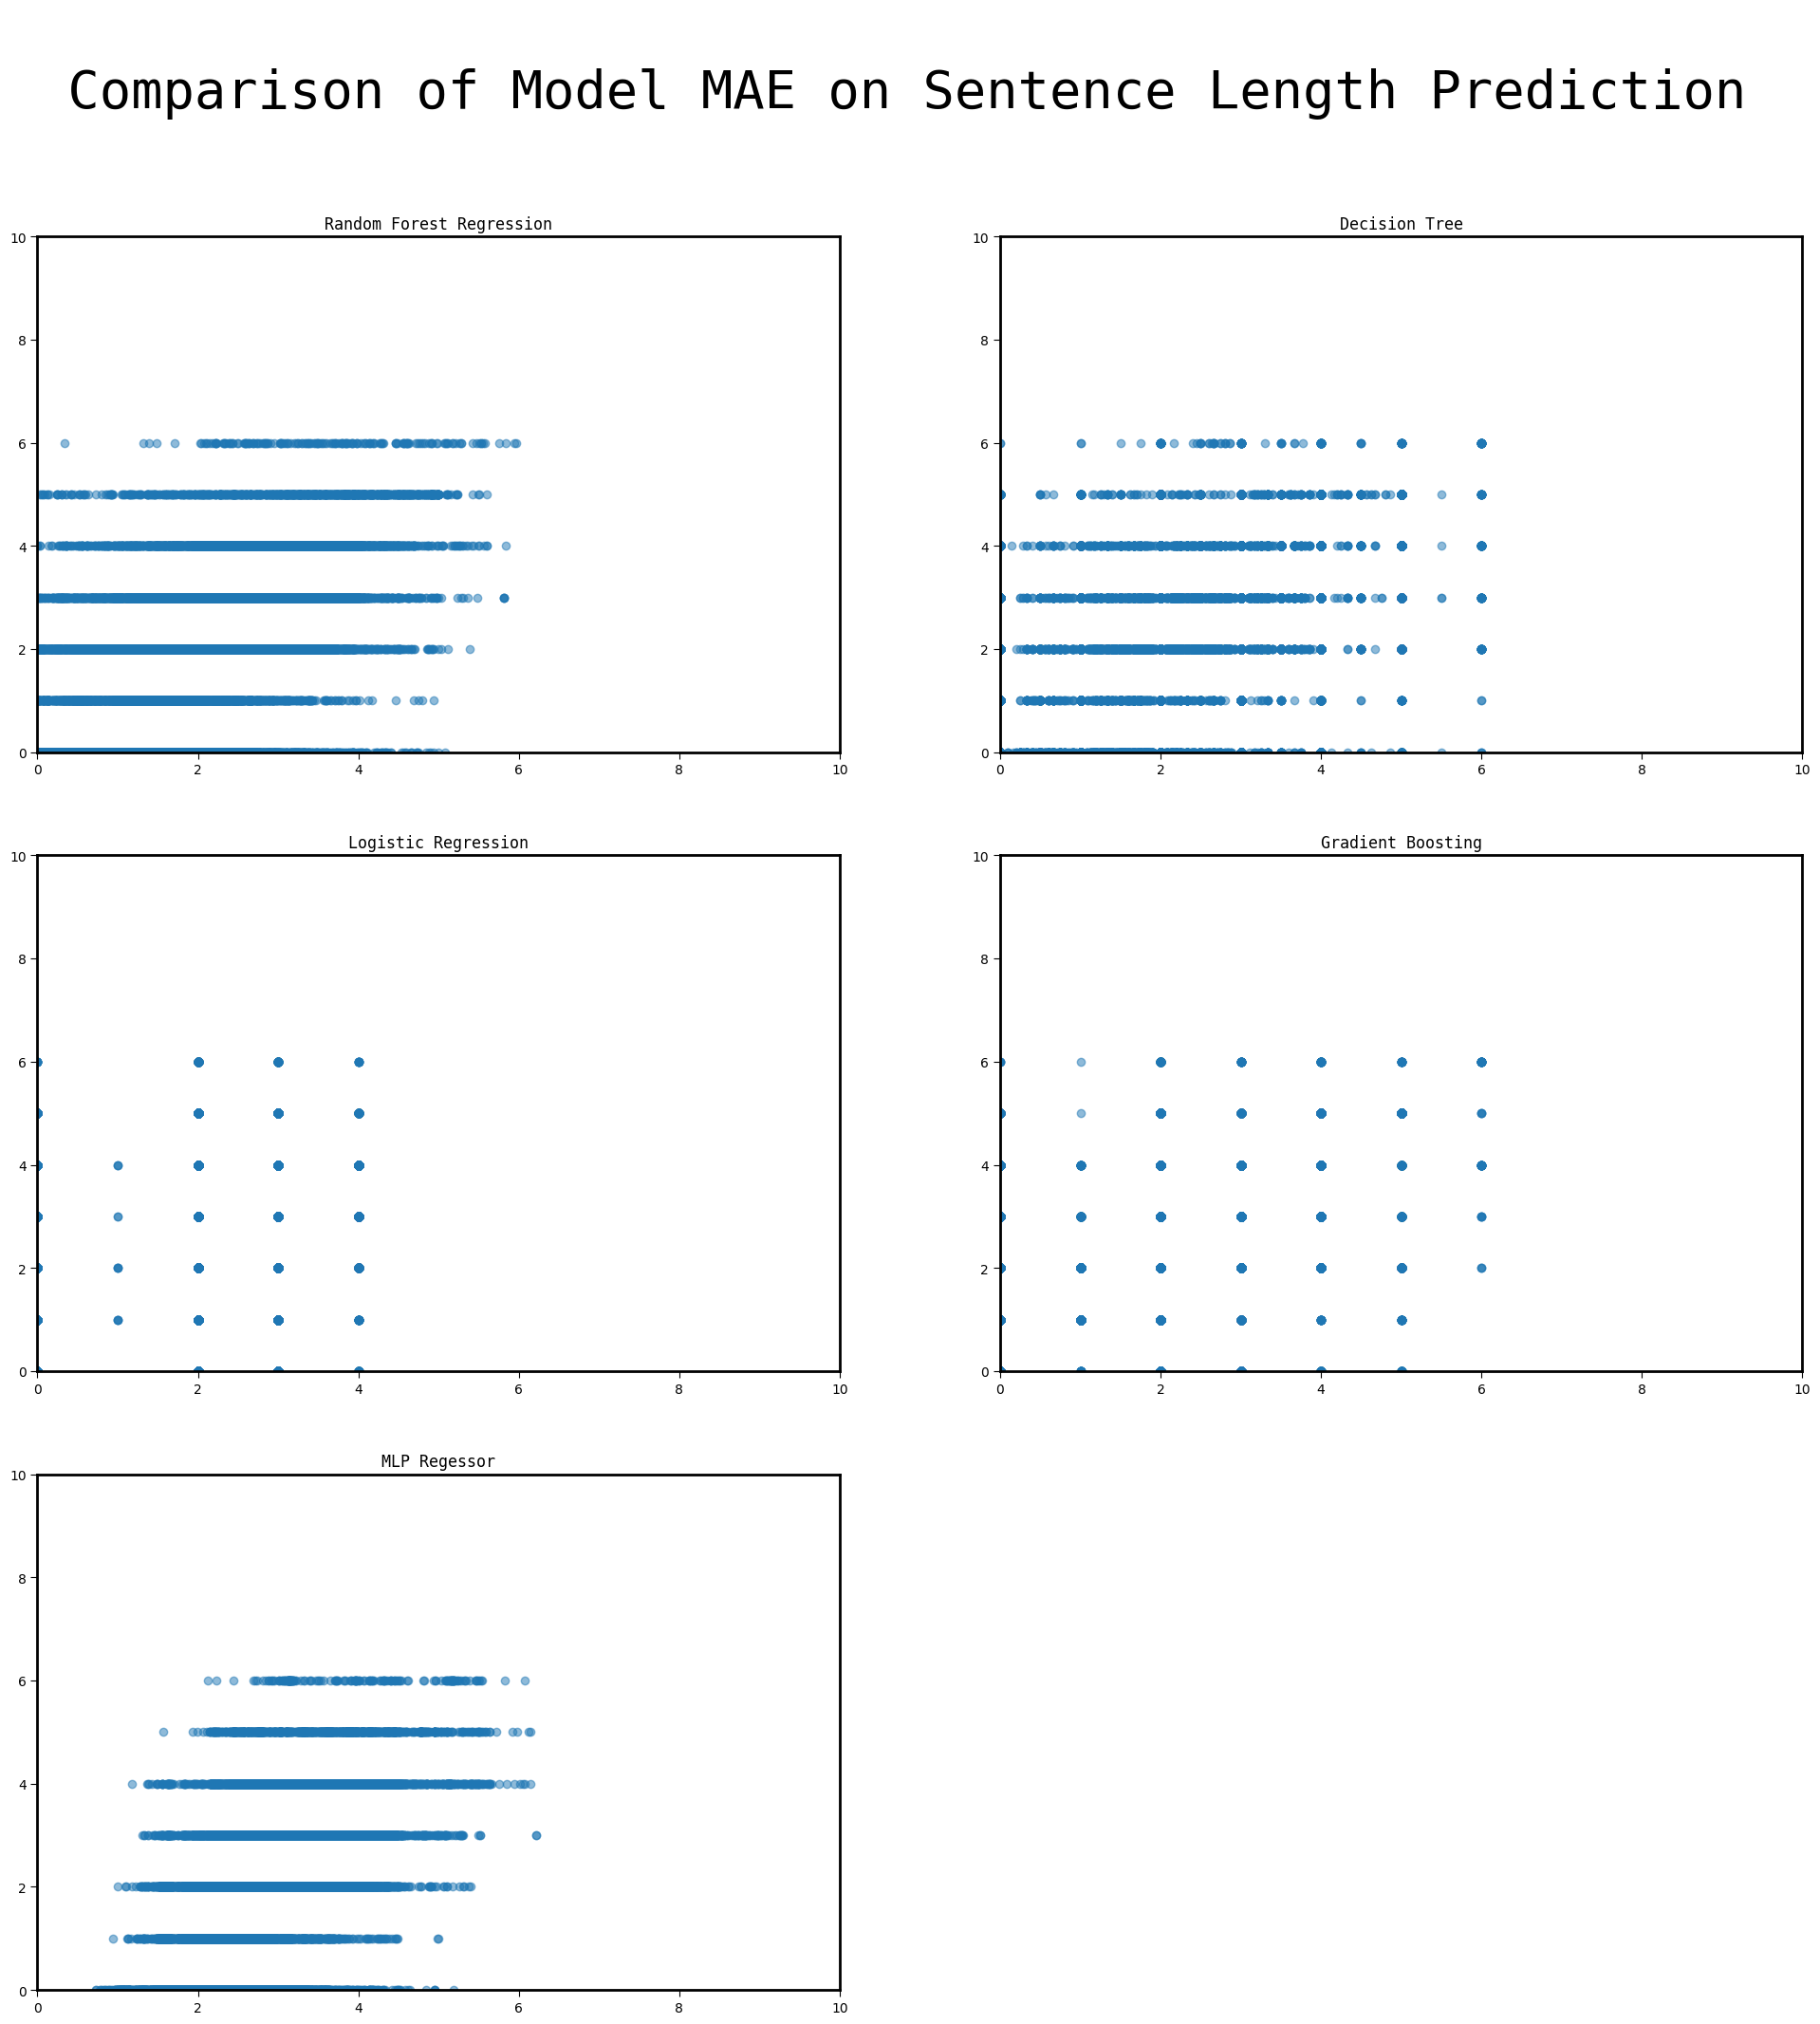

In [77]:
font = {'fontname':'monospace'}

fig, ax = plt.subplots(3, 2, figsize=(24,24))
plt.setp(ax, xlim=(0,10), ylim=(0,10))

plt.subplot(3, 2, 1)
plt.scatter(rf_y_pred, y_test, alpha=(0.5))
plt.title('Random Forest Regression', **font)

plt.subplot(3, 2, 2)
plt.scatter(dt_y_pred, y_test, alpha=(0.5))
plt.title('Decision Tree', **font)

plt.subplot(3, 2, 3)
plt.scatter(lr_y_pred, y_test, alpha=(0.5))
plt.title('Logistic Regression', **font)

plt.subplot(3, 2, 4)
plt.scatter(gb_y_pred, y_test, alpha=(0.5))
plt.title('Gradient Boosting', **font)

plt.subplot(3, 2, 5)
plt.scatter(mlp_y_pred, y_test, alpha=(0.5))
plt.title('MLP Regessor', **font)

fig.delaxes(ax[2,1])

plt.suptitle('\n Comparison of Model MAE on Sentence Length Prediction', **font, fontsize=40)
plt.savefig('MAEbyModel.png', dpi=100, bbox_inches='tight')

plt.show()

{'randomForest': '0.8950070013798909', 'decisionTree': '0.9900490871432016', 'logisticRegression': '1.0123666666666666', 'gradientBoosting': '0.8402', 'mlp': '0.8859117034445424'}


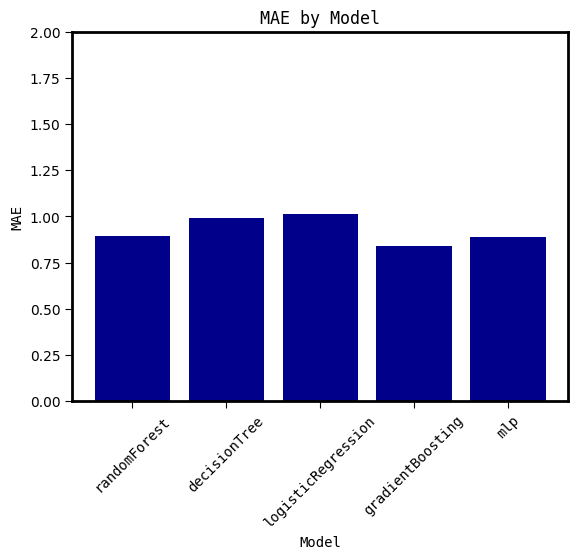

In [148]:
# plot MAE by model
print(model_metrics)
plt.bar(model_metrics.keys(), [float(value) for value in model_metrics.values()], color='darkblue')
plt.xlabel('Model', **font)
plt.xticks(rotation=45, **font)
plt.ylim(0, 2)
plt.ylabel('MAE', **font)

plt.title('MAE by Model', **font)
plt.savefig('MAEbyModelBar.png', dpi=100, bbox_inches='tight')

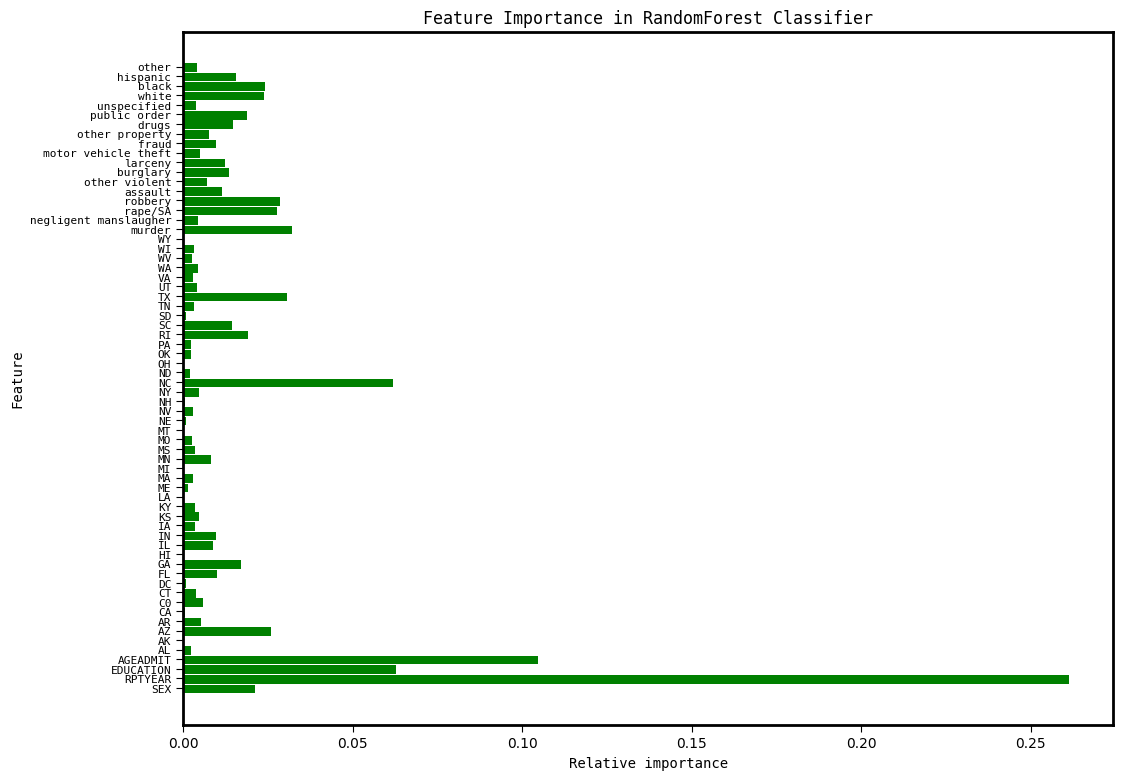

In [145]:
# plot of feature importances
y = rf.feature_importances_
fig, ax = plt.subplots() 
width = 0.9
ind = np.arange(len(y)) 
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(feature_cols, minor=False, **font, size=8)
plt.title('Feature Importance in RandomForest Classifier', **font)
plt.xlabel('Relative importance', **font)
plt.ylabel('Feature', **font)
fig.set_size_inches(12, 9, forward=True)
plt.savefig('Results/feature_importance_all_cats.pngFeatureImportance.png', dpi=100, bbox_inches='tight')

In [115]:
# Deep Learning Model with MLPRegressor on all data
from sklearn.neural_network import MLPRegressor

one_hot_df.drop(columns=['Unnamed: 0', 'STATE', 'RACE', 'OFFDETAIL', 'ADMTYPE', 'OFFGENERAL', 'ADMITYR', 'RELYR', 'RELTYPE', 'AGERLSE', 'TIMESRVD'], inplace=True)

# "independent" variables
feature_cols = list(one_hot_df.columns.values)
feature_cols.remove('SENTLGTH')

X = one_hot_df[feature_cols] # Features
y = one_hot_df['SENTLGTH'] # Target variable

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

mlp_y_pred = regr.predict(X_test)
print("R^2 Score: ", regr.score(X_test, y_test))

mae = str(np.mean(abs(mlp_y_pred - y_test)))
print("Mean Absolute Error: " + mae)

model_metrics['mlp'] = mae

R^2 Score:  0.30660709678156994
Mean Absolute Error: 0.8859117034445424


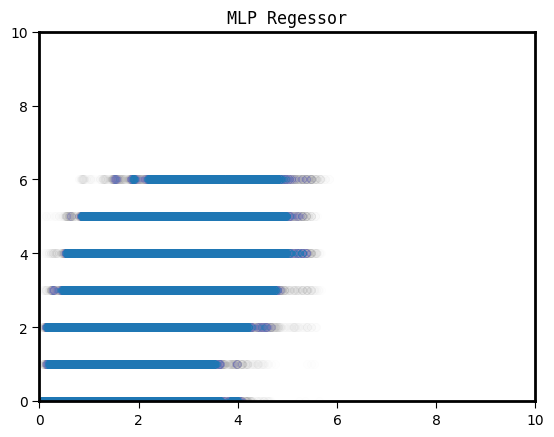

In [142]:
plt.scatter(mlp_y_pred, y_test, alpha=(0.002))
plt.title('MLP Regessor', **font)
plt.axis([0, 10, 0, 10])
plt.show()

In [149]:
# save mlp model
import pickle
pickle.dump(regr, open('mlp_model.sav', 'wb'))

